<a href="https://colab.research.google.com/github/wanichayaporn/Multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

Assumptions:



In [16]:
import pandas as pd

In [17]:
BFI_data = pd.read_csv('bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


##Factor Analysis '
##Assumptions:

ในข้อมูล multivariate ที่มีตัวแปร odserve variables จำนวน n ตัว 

มีตัวแปร Factor (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ 
โดย k < n

Assumptions ในการทำ Factor Analysis :

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be perfect ***multicollinearity***.
* There should not be ***homoscedasticity*** between the variables.

##การทำ Factor Analysis

##Import

In [27]:
from factor_analyzer import FactorAnalyzer

##Define

In [26]:
fa = FactorAnalyzer(n_factors=20)

##Fit - Transform

In [28]:
data_fa =fa.fit_transform(BFI_data_dropped)

In [29]:
data_fa.shape

(2436, 20)

##วิธีตัดสินว่าเราจะเหลือกี่ dimention (มี fectors ทั้งหมดกี่ตัว)

In [30]:
ev,v = fa.get_eigenvalues()

###ใช้ eigen values

In [31]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

##Scree Plot

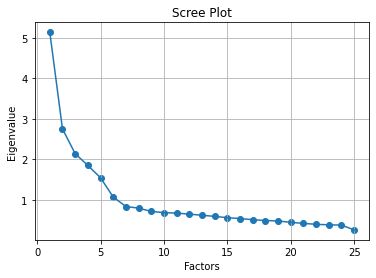

In [32]:
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

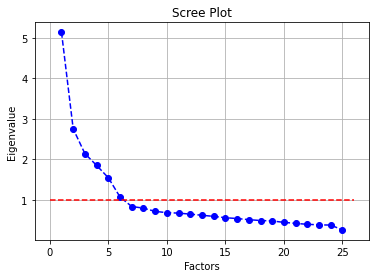

In [33]:
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo--')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1], 'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [34]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

##Factor loading

In [35]:
fa.loadings_.shape

(25, 20)

เเก้ error ModuleFoundtionError : No module named 'factor_analyzer' โดย

วิธี install Factor อื่นๆ

In [21]:
!pip install factor_analyzer #ถ้าเกิดเราใช้ libary ที่ไม่ได้มีคนใช้บ่อย เราจะต้องทำการติดตั้งเอง

     |████████████████████████████████| 40kB 3.4MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=dd178d91ec4146a82560973322d0dd66b8dfae5f1f61c2ed5e408cffb7e3ef40
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [22]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

##Quiz5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง .loc[]

In [36]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [37]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [38]:
BFI_data_dropped.shape

(2436, 25)

##Bartlett’s test

In [39]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped) 
chi_square_value, p_value

(18170.966350869243, 0.0)

##Kaiser-Meyer-Olkin (KMO) Test 

ถ้าค่า KMO model มีค่ามากกว่า 0.6 เเปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [40]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

In [41]:
kmo_model ##ถ้าคำนวณได้น้อยกว่า0.6 เเสดงว่าใช้ไม่ได้

0.8485397221949221

##รัน Factor Analysis อีกรอบ ด้วย pareeters จำนวน factor เท่ากับ 6

In [42]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [43]:
fa2.loadings_.shape

(25, 6)

##Plot factor loadings

In [44]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

##matrix plot

confirmatory

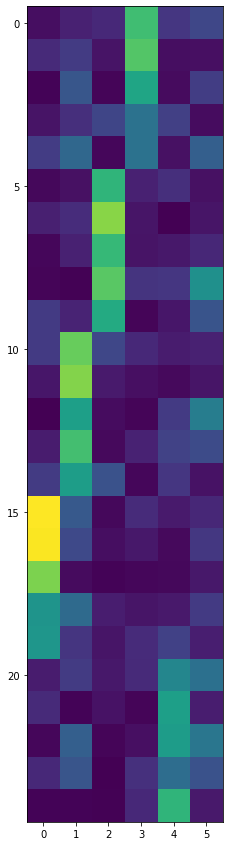

In [45]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_)) #ค่ามาก = สีสว่าง ,ค่าน้อย = เป็นสีเข้ม

##กราฟแท่ง

Exploratory

In [46]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

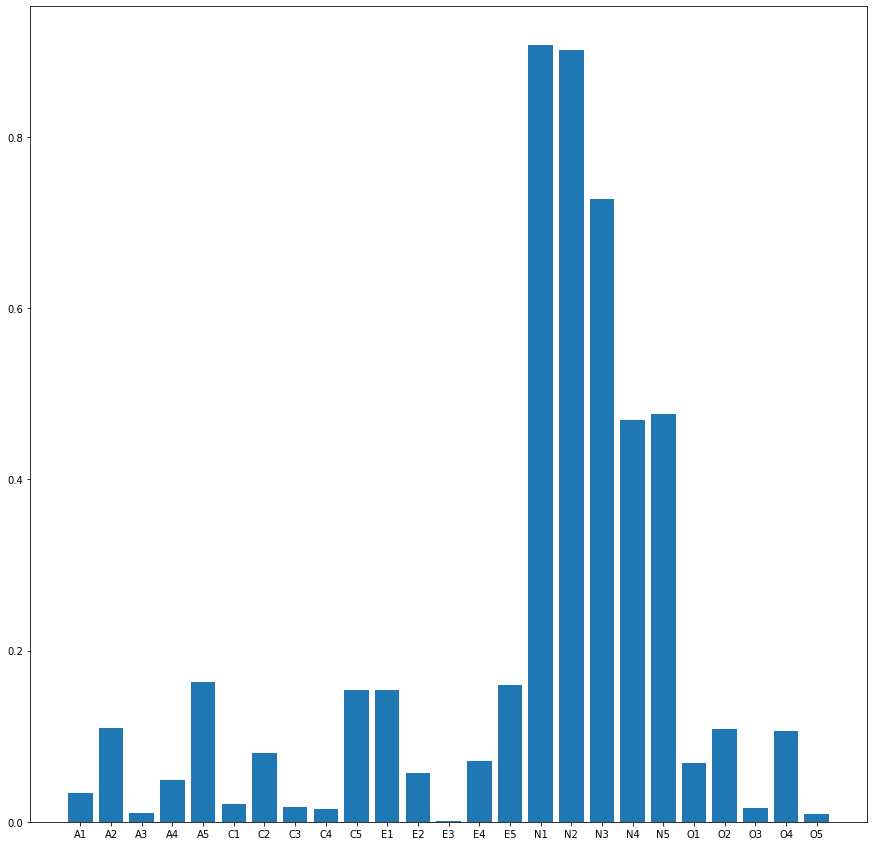

In [47]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

##Exam 3

https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view

In [146]:
import pandas as pd

In [162]:
FIFA_data = pd.read_csv('FIFA 2018 Statistics.csv')
FIFA_data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


เเก้ error ModuleFoundtionError : No module named 'factor_analyzer' โดย

##วิธี install Factor อื่นๆ

In [164]:
!pip install factor_analyzer #ถ้าเกิดเราใช้ libary ที่ไม่ได้มีคนใช้บ่อย เราจะต้องทำการติดตั้งเอง

In [165]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

##เลือกข้อมูลมาเฉพาะ Goal Scored ถึง Red ด้วยคำสั่ง .loc[]

In [185]:
FIFA_data_dropped = FIFA_data.iloc[:,3:-7]
FIFA_data_dropped ##เอาทุกแถว ตั้งแต่แถวที่ 3 ถึง -7

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [186]:
FIFA_data_dropped = FIFA_data_dropped.dropna()

In [187]:
FIFA_data_dropped.shape #ขนาดของ data

(128, 17)

##Bartlett’s test

In [188]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(FIFA_data_dropped)
chi_square_value, p_value ##ไม่ควรมี กราฟเป็นเส้นตรง 

(1299.3697851171412, 2.713580160466225e-189)

##Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 เเปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [189]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(FIFA_data_dropped) 
kmo_model ##ถ้าคำนวณได้น้อยกว่า0.6 เเสดงว่าใช้ไม่ได้
##ปัดเป็น0.6

0.5594556344508279

##การทำ Factor Analysis

 ## Import

In [190]:
from factor_analyzer import FactorAnalyzer

##Define

In [199]:
fa = FactorAnalyzer(n_factors=16) ##กำหนด factor เท่ากับ 16

##Fit - Transform

In [200]:
data_fa = fa.fit_transform(FIFA_data_dropped)

In [201]:
data_fa.shape

(128, 16)

##วิธีตัดสินว่าเราจะเหลือกี่ dimention (มี fectors ทั้งหมดกี่ตัว)

In [202]:
ev,v = fa.get_eigenvalues()

##ใช้ eigen values

In [203]:
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

##Scree Plot

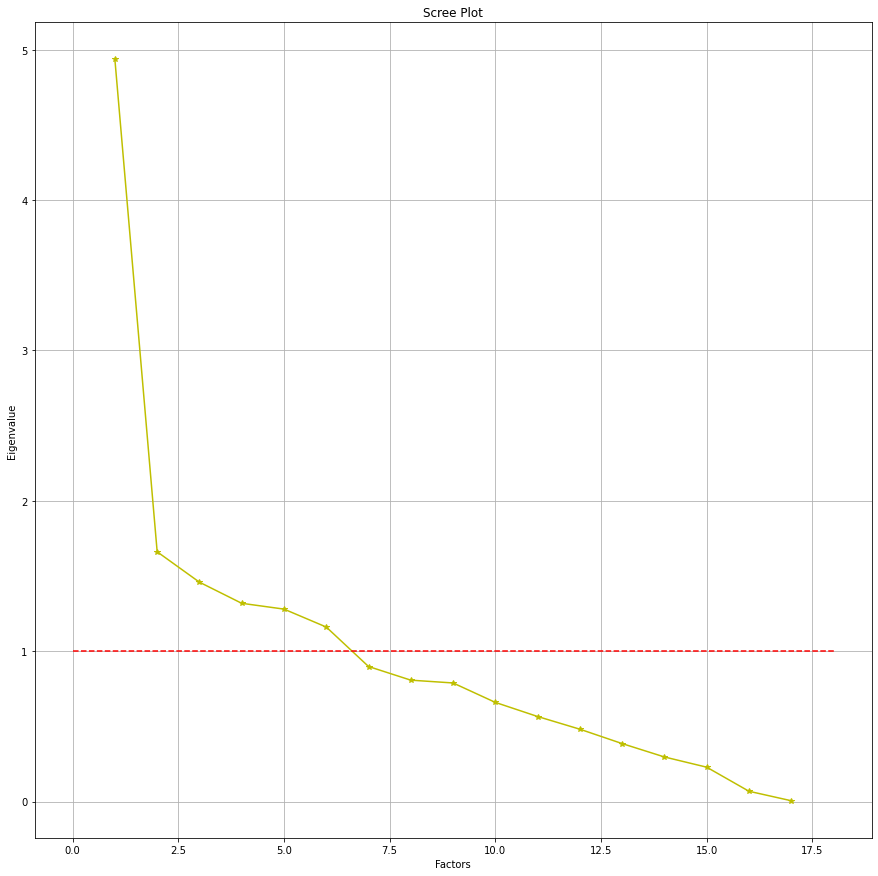

In [204]:
# Create scree plot using matplotlib
plt.plot(range(1,FIFA_data_dropped.shape[1]+1),ev,'y*-')
plt.plot([0,FIFA_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [205]:
data_fa[:,:6] #ดู 6 ตัวเพราะ มีค่ามากกว่า 1

array([[-1.02852235e+00,  6.84121245e-01,  2.62286805e+00,
        -6.13275893e-02, -5.44092674e-02,  2.00934276e-01],
       [ 7.27448293e-01, -5.24186679e-01, -1.07869132e+00,
        -8.50925779e-01, -2.41176630e-01,  2.50883401e-01],
       [-6.45675050e-01,  1.82115619e-01, -5.69637077e-01,
         2.26028940e-01,  3.37982843e-02, -1.68147976e-01],
       [ 7.47704941e-01,  1.72940207e-01, -2.02499240e-01,
        -1.29479087e+00, -1.29504953e-01, -5.66581441e-02],
       [ 7.64590473e-01, -1.02338004e+00, -2.54183776e-01,
         6.17252933e-01,  1.72354639e-01,  2.04944359e-01],
       [-1.37927654e+00, -1.02367999e+00, -1.18075480e-01,
         9.43416646e-01, -7.19004216e-01, -5.47973852e-01],
       [-7.75361184e-01, -5.36622975e-01,  8.32824491e-01,
        -2.23469488e-01,  1.60618514e-01, -8.09773397e-02],
       [ 1.44271720e+00, -9.83264072e-02,  1.09942840e+00,
        -5.21200358e-01, -4.13879311e-01,  9.66101100e-02],
       [ 1.77079119e-01, -3.68717730e-01,  9.499

##รัน Factor Analysis อีกรอบ ด้วย pareeters จำนวน factor เท่ากับ 6

In [206]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(FIFA_data_dropped)

In [207]:
fa2.loadings_.shape

(17, 6)

##Plot factor loadings

In [208]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

##matrix plot

confirmatory

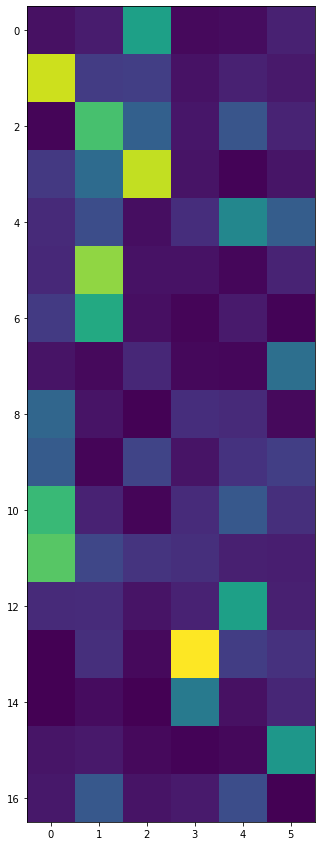

In [209]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_)) 

##กราฟแท่ง

Exploratory

In [210]:
FIFA_data_dropped.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

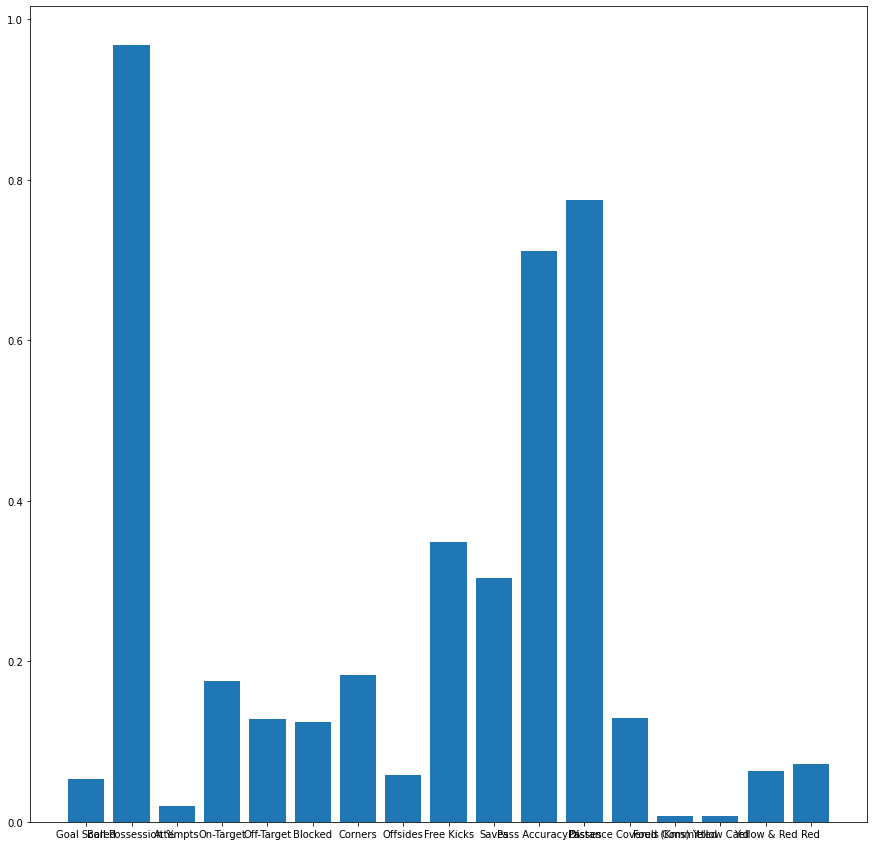

In [213]:
plt.bar(range(17),np.absolute(fa2.loadings_[:,0]),tick_label=FIFA_data_dropped.columns)
